In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def train_perceptron(labels, features, alpha, num_iters=100):
    weights = np.random.randn(features.shape[1])
    bias = np.random.randn()

    for _ in range(num_iters):
        for label, feature in zip(labels, features):
            prediction = 1 if np.dot(feature, weights) + bias > 0 else 0
            weights += alpha * (label - prediction) * feature
            bias += alpha * (label - prediction)

        predictions = np.where(np.dot(features, weights) + bias > 0, 1, 0)
        accuracy = np.equal(predictions, labels).sum() / predictions.size
        lognorm = np.log(np.linalg.norm(weights))
        yield accuracy, lognorm

In [3]:
def plot(name, labels, features, alphas):
    fig, (acc_ax, lnorm_ax) = plt.subplots(1, 2)
    fig.set_figwidth(15)
    plt.tight_layout()

    for alpha in alphas:
        accuracy, lognorm = zip(*train_perceptron(labels, features, alpha))
        acc_ax.plot(accuracy, label=alpha)
        lnorm_ax.plot(lognorm, label=alpha)

    acc_ax.set_xlabel('Number of Epochs')
    acc_ax.set_ylabel('Classification Accuracy (%)')
    acc_ax.legend(title='Learning Rate')
    lnorm_ax.set_xlabel('Number of Epochs')
    lnorm_ax.set_ylabel('Log of L2 Norm of Weights')
    lnorm_ax.legend(title='Learning Rate')

    plt.suptitle(name)
    plt.show()

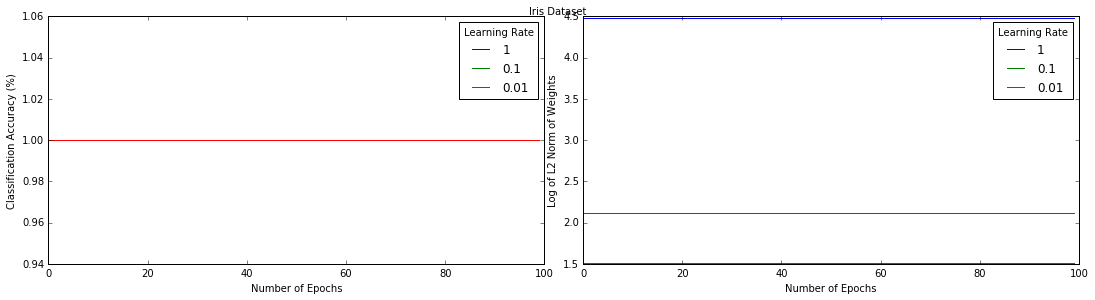

In [4]:
data = np.genfromtxt('Fisher.csv', delimiter=',', skip_header=1)
labels = data[:, 0]
labels[labels != 0] = 1
features = data[:, 1:]
alphas = [1, .1, .01]
plot('Iris Dataset', labels, features, alphas)

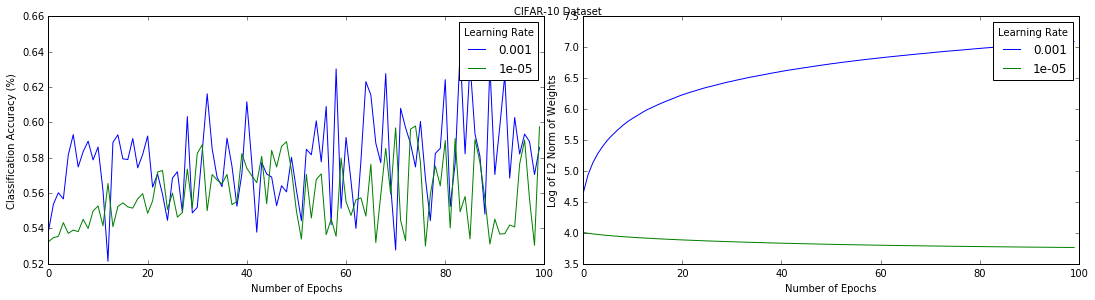

In [5]:
data = pickle.load(open('cifar-10-batches-py/data_batch_1', 'rb'), encoding='bytes')
features = data[b'data'].astype(float)
labels = np.array(data[b'labels'])
labels[labels < 5] = 0
labels[labels >= 5] = 1
alphas = [.001, .00001]
plot('CIFAR-10 Dataset', labels, features, alphas)